In [41]:
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
import numpy as np


from skimage.morphology import footprint_rectangle
from skimage.filters.rank import mean

# Filtros lineales suavizantes

## Filtro promedio

### Cargue la imagen de trabajo meb.png

In [32]:
meb = cv2.imread("images/meb.png", cv2.IMREAD_GRAYSCALE)

### Visualice la imagen y su histograma.

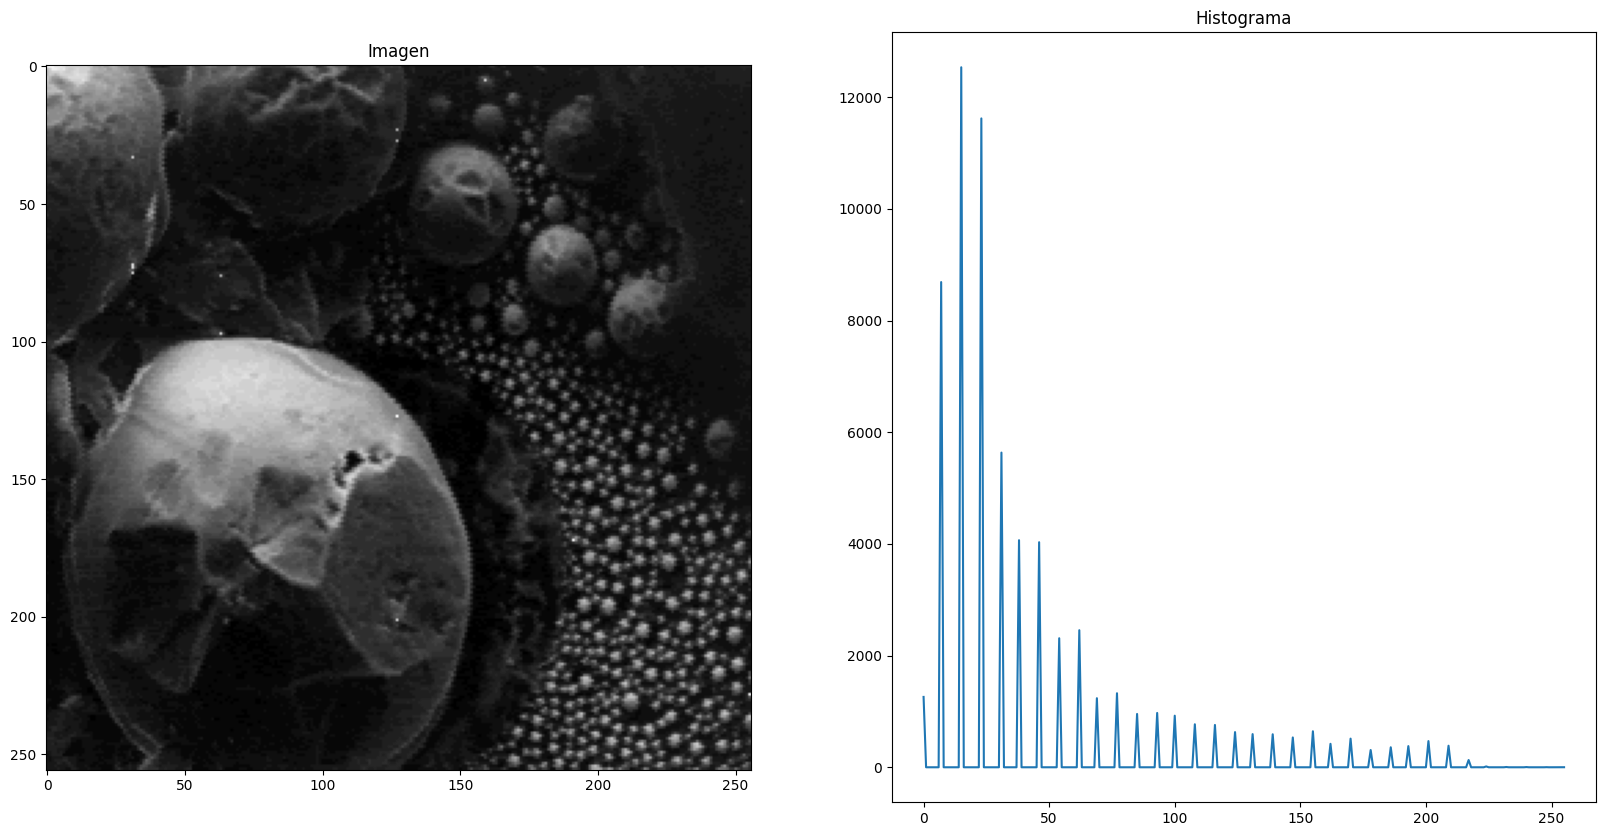

In [33]:
fig, axes = plt.subplots(1,2, figsize = (20,10)) 
axes[0].imshow(meb, cmap= 'gray', vmin = 0, vmax= 255)
axes[0].set_title('Imagen')
hist = cv2.calcHist([meb], [0], None, [256], [0, 256])
axes[1].plot(hist)
axes[1].set_title('Histograma')
plt.show()

### Describa su forma: ¿es continuo/discontinuo?, ¿cuántos niveles de gris diferentes tiene?, ¿cuáles son estos niveles de gris?

Como se puede apreciar, el histograma es discontínuo ya que no hay una distribución continua de los colores, debido a que entre los tonos que se encuentran en la imagen hay colores en 0, lo que significa que casi no hay tonos intermedios entre los colores. Los niveles de gris pincipales se encuentran entre 0 y 80. Pero hay algunos tonos entre 100 y 230, pero son mucho menos representativos con respecto a los niveles más oscuros.

### Partiendo del histograma, deduzca con cuántos bits ha sido numerizada esta imagen.

Como se puede apreciar en el histograma, hay alrededor de 29 picos que se pueden ver a simple vista. Es por esto que se puede deducir que se utilizan 5 bits para numerizar la imagen.

### Aplique un filtro promedio utilizando una máscara de tamaño 3x3 a esta imagen. Cualitativamente, ¿cómo es la imagen resultado?

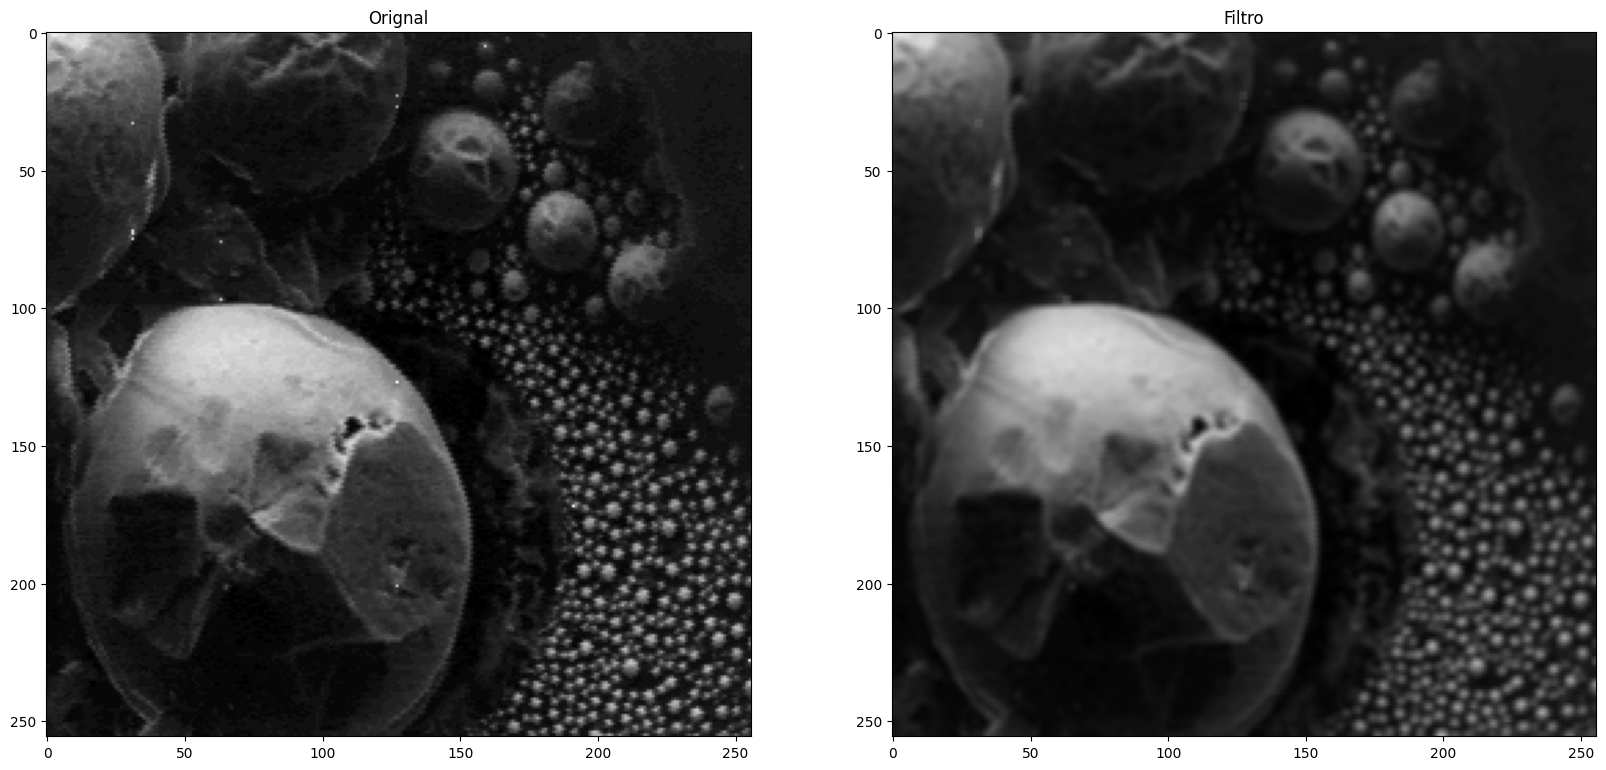

In [34]:
meb_avg = mean(meb, footprint_rectangle((3,3)))

fig, axes = plt.subplots(1,2, figsize = (20,10)) 
axes[0].imshow(meb, cmap= 'gray', vmin = 0, vmax= 255)
axes[0].set_title('Orignal')
axes[1].imshow(meb_avg, cmap= 'gray', vmin = 0, vmax= 255)
axes[1].set_title('Filtro')
plt.show()

### Visualice el histograma de esta nueva imagen, y compárelo con el histograma de la imagen original (forma general, altura de los picos, ...).

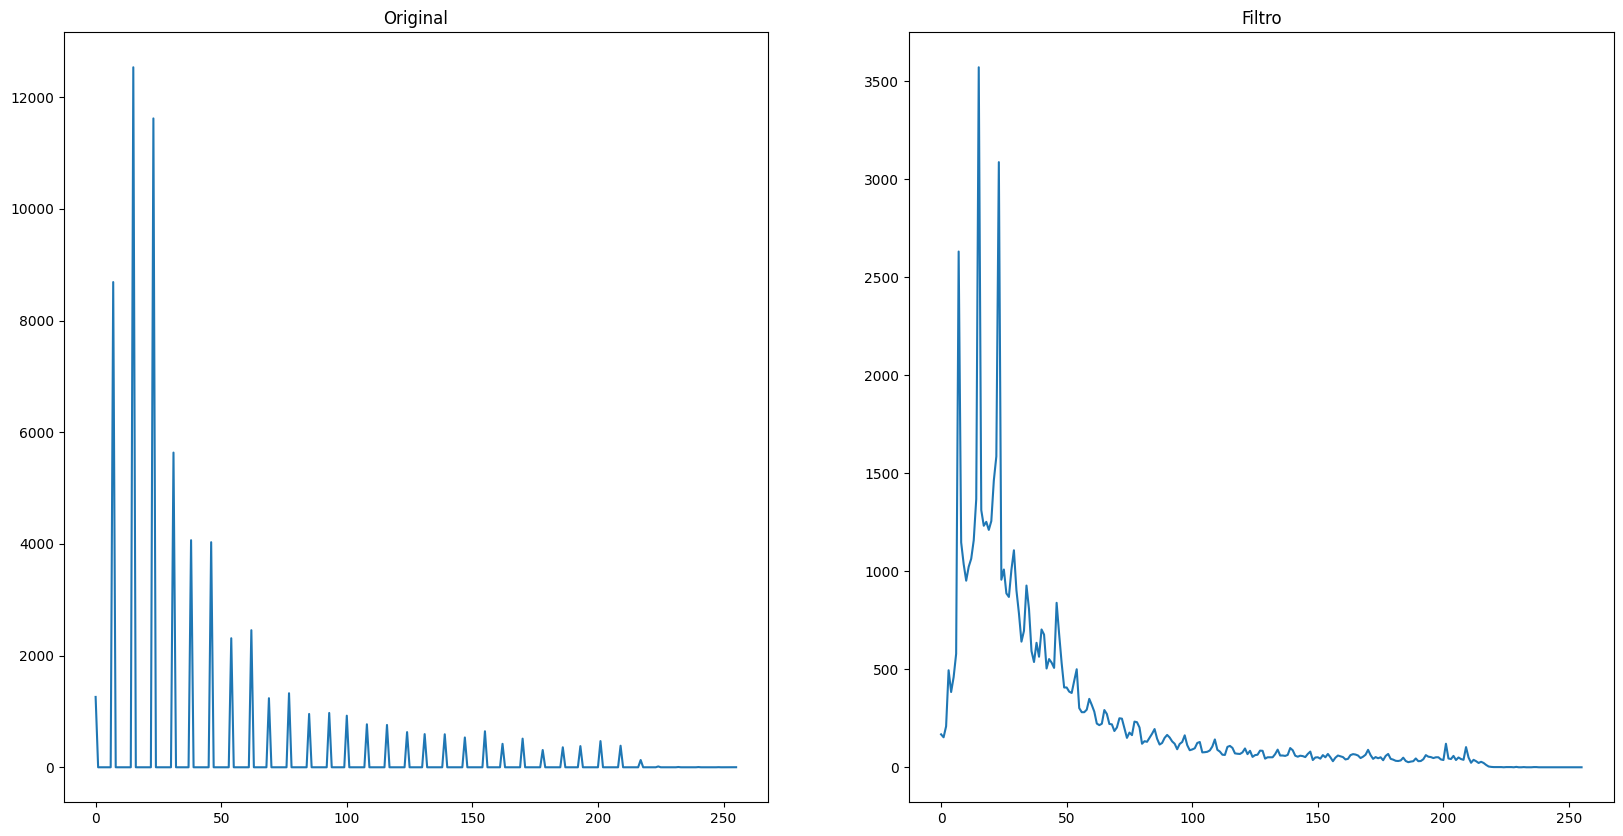

In [35]:
fig, axes = plt.subplots(1,2, figsize = (20,10)) 
hist = cv2.calcHist([meb], [0], None, [256], [0, 256])
axes[0].plot(hist)
axes[0].set_title('Original')
hist = cv2.calcHist([meb_avg], [0], None, [256], [0, 256])
axes[1].plot(hist)
axes[1].set_title('Filtro')
plt.show()

Como se puede apreciar, se mantienen los picos pero ahora se pueden ver muchos más tonos de gris. Esto es porque el promedio de los colores permite obtener tonos intermedios entre los obtenidos en la imagen original. Se conserva la distribución del histograma pero los valores de 0 ahora toman valores intermedios entre los picos ayacentes.

### Calcule la imagen de diferencia con la original. Justifique el resultado obtenido (¿en cuáles regiones de la imagen son visibles las diferencias?, ¿por qué?).

Como se puede apreciar, se conservan los picos dentro del histograma, pero los colores que antes no se utilizaban ahora aparecen en la imagen, esto debido al calculo de promedios, lo cual da tonos intermedios dentro de los colores. Esto causa un efecto de blur en la imagen, ya que evita que se vean claramente los elementos al reducir los cambios de color dentro de la imagen. Este efecto se puede dislumbrar en toda la imagen, pero sobre todo es posible ver este efecto en las "piedras", ya que el filtro no permite ver claramente las grietas que existen ahí, y que se ven claramente en la imagen original. Esto debido a que las diferencias de color entre los cuerpos y las grietas fueron suavizadas debidas al filtro.

### Ahora filtre la imagen original con un filtro promedio utilizando una máscara de tamaño 5x5. Paralelamente, filtre la imagen original, aplicando consecutivamente sobre esta, dos filtros promedio de tamaño 3x3. Haga una evaluación visual de los resultados: ¿las dos imágenes obtenidas son idénticas? ¿por qué? ¿cuál de los dos tratamientos suprime mejor los cambios de nivel de gris de la imagen?

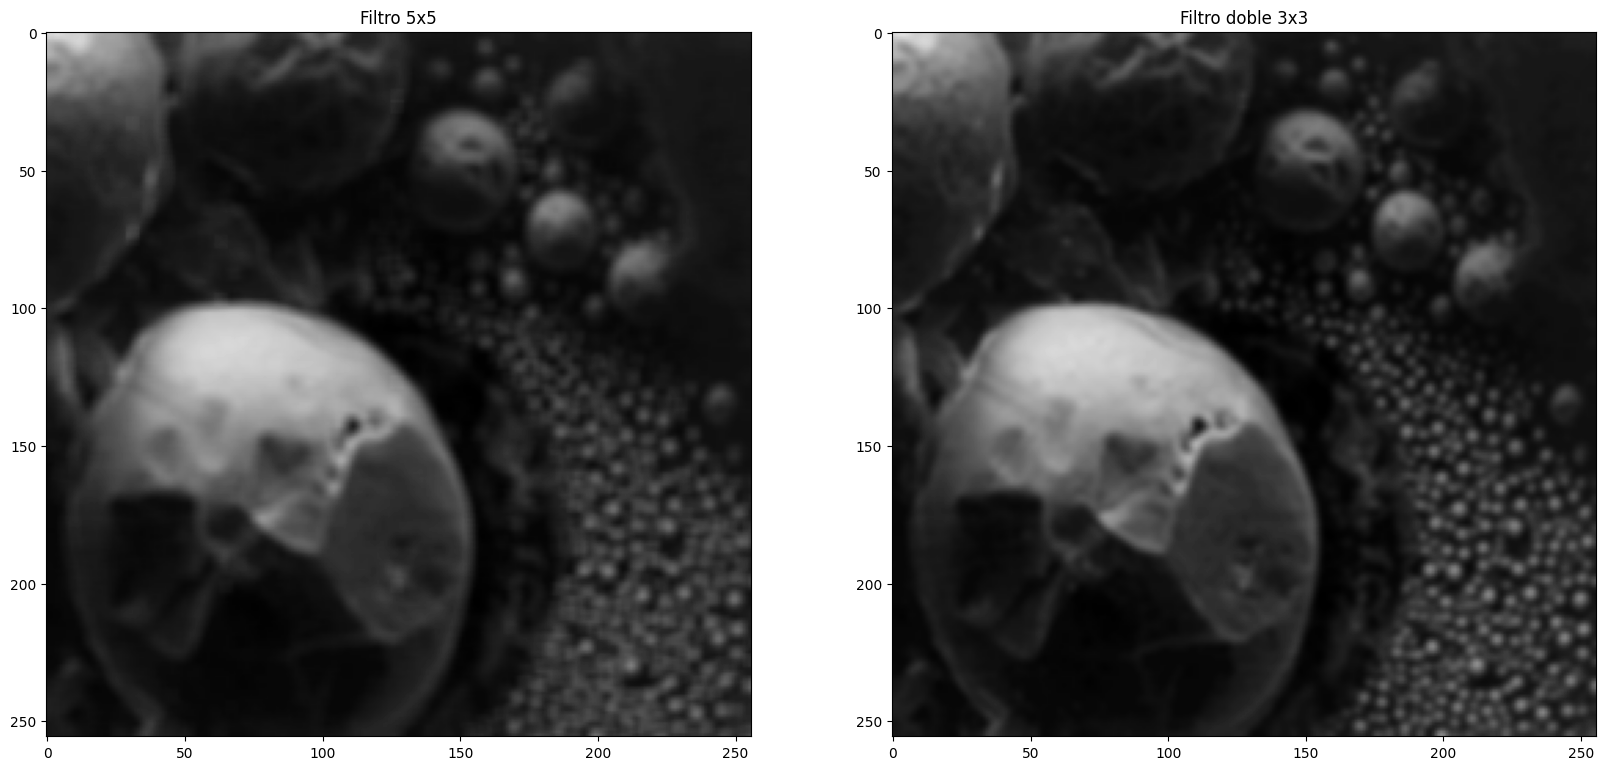

In [36]:
meb_55 = mean(meb, footprint_rectangle((5,5)))

meb_33_2 = mean(meb, footprint_rectangle((3,3)))
meb_33_2 = mean(meb_33_2, footprint_rectangle((3,3)))

fig, axes = plt.subplots(1,2, figsize = (20,10)) 
axes[0].imshow(meb_55, cmap= 'gray', vmin = 0, vmax= 255)
axes[0].set_title('Filtro 5x5')
axes[1].imshow(meb_33_2, cmap= 'gray', vmin = 0, vmax= 255)
axes[1].set_title('Filtro doble 3x3')
plt.show()

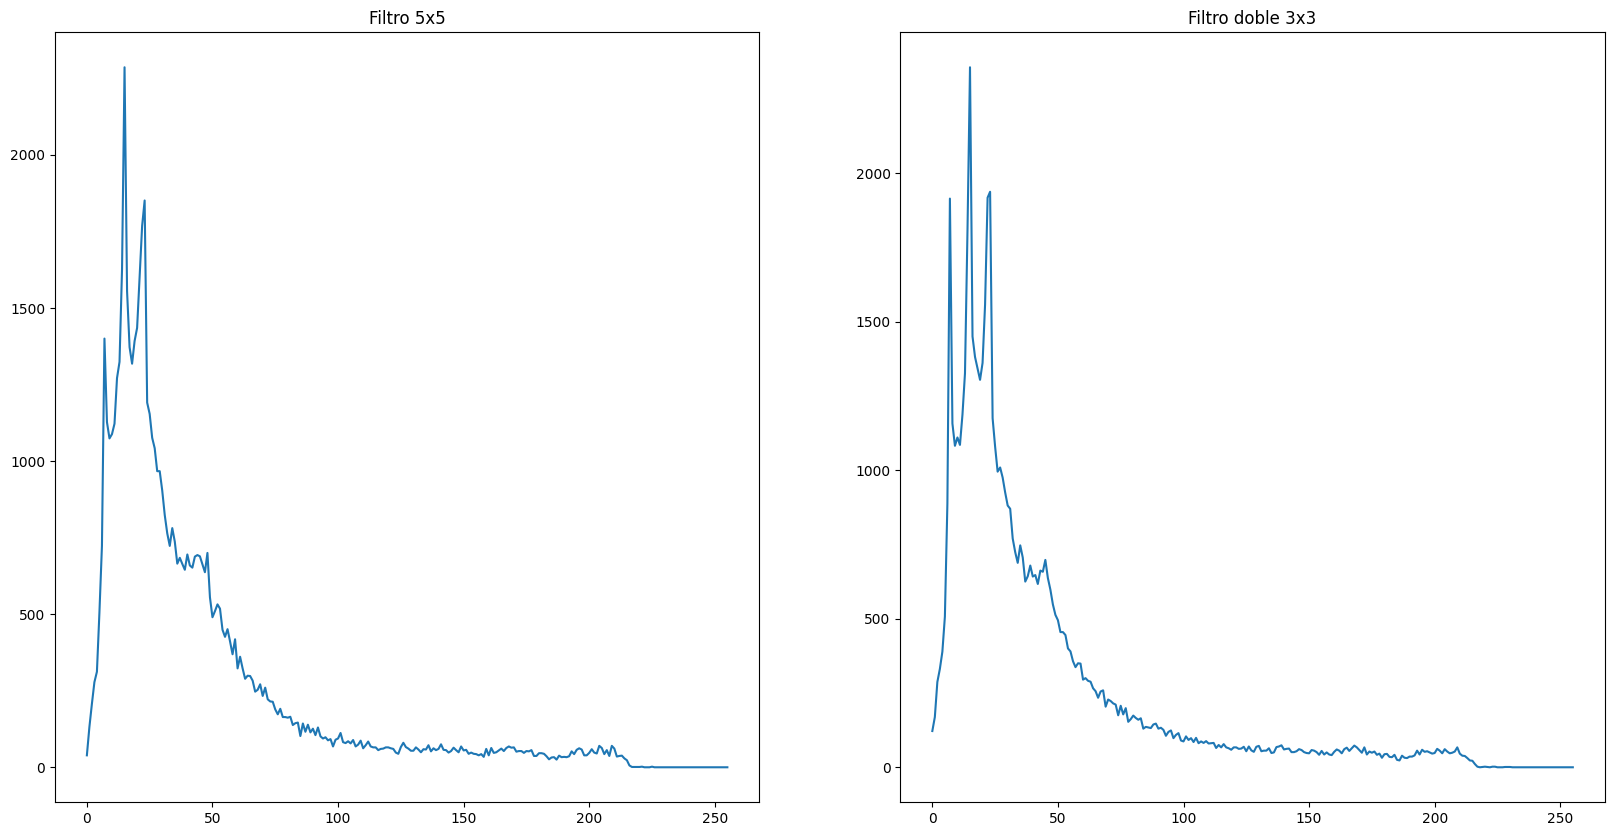

In [37]:
fig, axes = plt.subplots(1,2, figsize = (20,10)) 
hist = cv2.calcHist([meb_55], [0], None, [256], [0, 256])
axes[0].plot(hist)
axes[0].set_title('Filtro 5x5')
hist = cv2.calcHist([meb_33_2], [0], None, [256], [0, 256])
axes[1].plot(hist)
axes[1].set_title('Filtro doble 3x3')
plt.show()

Las imágenes obtenidas no son idénticas. Al aplicar un filtro promedio de 5x5, se promedian los valores de los píxeles circundantes en una sola operación, generando un desenfoque más intenso y uniforme. En cambio, aplicar dos filtros de 3x3 consecutivos equivale a una convolución con un núcleo compuesto de 5x5, pero con una distribución de pesos diferente, donde los píxeles centrales tienen mayor influencia debido a la aplicación secuencial. Esto produce un suavizado menos homogéneo y conserva ligeramente más detalles. El filtro de 5x5 suprime mejor los cambios de nivel de gris, ya que promedia un área más amplia en una sola pasada, reduciendo con mayor eficacia las variaciones abruptas en la imagen.

### Convolucionar una imagen dos veces con una misma máscara equivale a hacer una sola convolución con otra máscara, obtenida por convolución de la máscara inicial con ella misma. ¿Cuál es entonces la máscara resultante de la convolución de la máscara del filtro promedio 3x3 con ella misma? ¿Cómo es la máscara del filtro promedio 5x5? Con base en la forma de estas dos máscaras, justifique los resultados visuales obtenidos en el punto anterior.

### Por último, filtre la imagen original con un filtro promedio utilizando una máscara de tamaño 25x25. Haga una evaluación visual del resultado: ¿qué objetos de la imagen original se conservaron?¿qué sucedió con las estructuras pequeñas presentes en la imagen original?¿por qué?

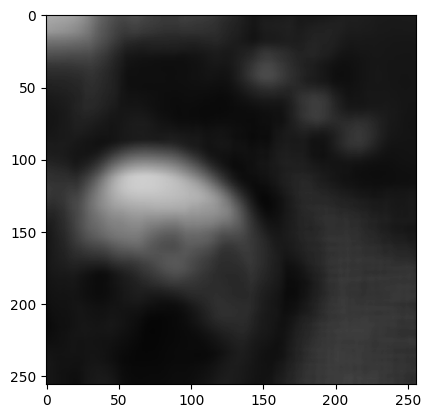

In [38]:
meb_25 = mean(meb, footprint_rectangle((25,25)))

plt.imshow(meb_25, cmap= 'gray', vmin = 0, vmax= 255)
plt.show()

Solo se observa la piedra principal en el centro, tambien la de la esquina superior izquierda y las tres piedras de la esquina derecha superior. Los elementos pequeños ya no se reconocen, esto debido a que el filtro hace que las pequeñas fronteras se desaparezcan debido a que toman el valor promedio de los pixeles cercanos.

## Comparación entre el filtro promedio y el filtro gaussiano

### Cargue ahora la imagen impact.png.

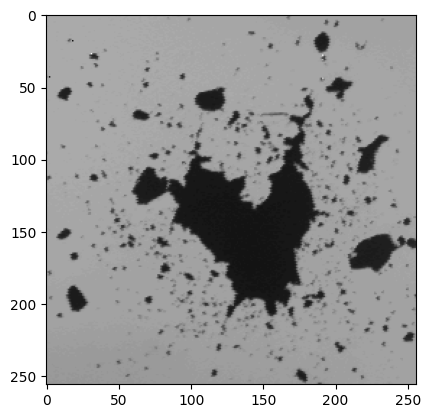

In [39]:
impact = cv2.imread("images/impact.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(impact, cmap= 'gray', vmin = 0, vmax= 255)
plt.show()

### Aplique a esta imagen un filtro promedio con una máscara de tamaño 5x5 usando una convolución. Visualice el resultado.

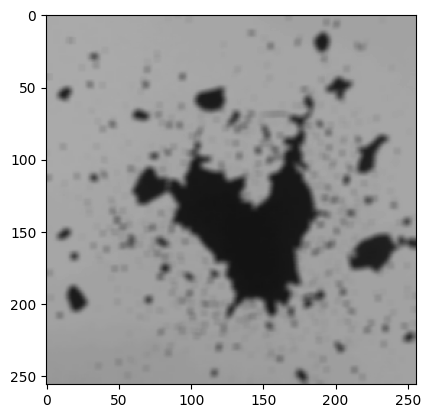

In [40]:
impact_avg = mean(impact, footprint_rectangle((5,5)))

plt.imshow(impact_avg, cmap= 'gray', vmin = 0, vmax= 255)
plt.show()

### Ahora aplique a la imagen original un filtro gaussiano con una máscara de tamaño 5x5 usando una convolución. Visualice el resultado.

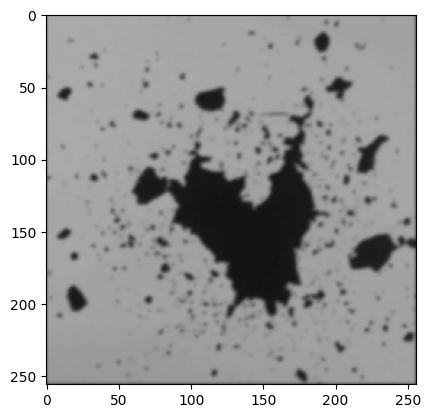

In [43]:
kernel = np.array([[1,  4,  7,  4, 1],
                              [4, 16, 26, 16, 4],
                              [7, 26, 41, 26, 7],
                              [4, 16, 26, 16, 4],
                              [1,  4,  7,  4, 1]], dtype=np.float32)

kernel /= kernel.sum()  

impact_conv = convolve(impact, kernel, mode='constant', cval=0)
plt.imshow(impact_conv, cmap= 'gray', vmin = 0, vmax= 255)
plt.show()


### Calcule la diferencia de los resultados de los dos filtros. Visualice el resultado. Justifique el resultado obtenido (¿en cuáles regiones de la imagen son visibles las diferencias?, ¿por qué?...).

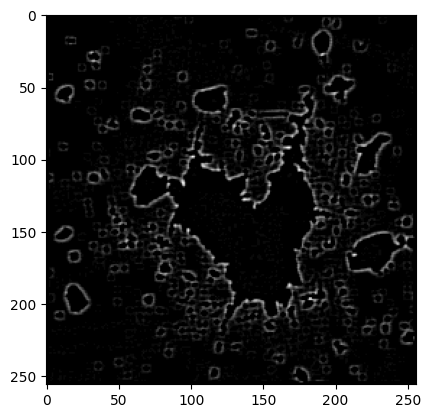

In [49]:
subtraction = cv2.subtract(impact_conv, impact_avg)
plt.imshow(subtraction, cmap= 'gray')
plt.show()

### ¿ En qué casos (características de las imágenes) preferiría utilizar un filtro promedio a un filtro gaussiano y visceversa?

Se prefiere un filtro medio cuando se busca eliminar ruido de alta frecuencia (como sal y pimienta) en imágenes con texturas simples o bordes no críticos, ya que es eficiente desde el punto de vista computacional y eficaz para el suavizado uniforme, aunque genera más desenfoque. En cambio, un filtro gaussiano es ideal para preservar los bordes y reducir el ruido gaussiano o de baja frecuencia, gracias a su núcleo ponderado que atenúa los detalles finos sin distorsionar bruscamente las transiciones.